# Hierarchical Clustering

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [73]:
x , _  = make_blobs(n_samples = 100, centers = 3, cluster_std = 1.0)


In [74]:
model = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
labels  = model.fit_predict(x)

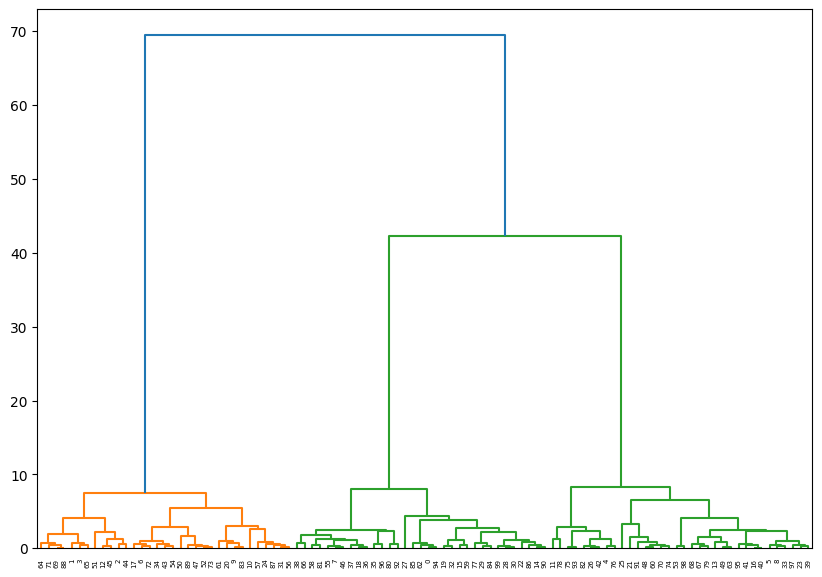

In [75]:
linkage = linkage(x, method = 'ward')
plt.figure(figsize = (10, 7))
dendrogram(linkage)
plt.xticks(rotation = 90)
plt.show()

In [76]:
x

array([[10.61049822, -6.13147553],
       [-3.50677688, -1.86129577],
       [-4.49680149, -1.30611351],
       [-2.77023252, -1.54843871],
       [ 4.33599813,  2.16150709],
       [ 5.64064549, -0.45783565],
       [-2.95541581,  0.13106436],
       [10.14168872, -4.44898428],
       [ 5.53010392, -0.13917545],
       [-1.73104714,  0.50583145],
       [-0.34444201, -1.46970255],
       [ 5.72865828,  3.00928718],
       [-4.43418183, -0.67323372],
       [ 3.66585888, -0.56395116],
       [ 9.75387467, -5.87687797],
       [ 8.97506371, -6.29410075],
       [ 4.61751034,  0.50188422],
       [-2.88892575, -0.17077929],
       [ 9.68698502, -4.4701868 ],
       [ 9.23178927, -6.83227682],
       [-2.12696558,  1.03333847],
       [ 6.79318305,  0.94551889],
       [ 9.77716945, -6.38360872],
       [ 4.91017227, -0.40797707],
       [-2.3137191 ,  0.02630565],
       [ 8.25375843, -1.20522929],
       [ 5.17635534,  1.57383284],
       [ 6.41439744, -5.65278929],
       [ 9.55052152,

# Divisive

In [77]:
x , _ = make_blobs(n_samples=100, centers=1, cluster_std= 2, random_state=42)


In [78]:
def divisive_clustering(data , max_cluster = 4):
    clusters = [data]
    labels = np.zeros(len(data), dtype = int)
    while len(clusters) < max_cluster:
        idx_to_split = np.argmax([len(c) for c in clusters])      # argmax return the index value of the large element in the array

        cluster_to_split = clusters.pop(idx_to_split)
        # get a new label to assign to the newly format cluster 
        current_lable = np.max(labels) + 1
        # KMean to split the cluster
        kmeans = KMeans(n_clusters = 2, random_state = 42)
        split_labels = kmeans.fit_predict(cluster_to_split)

        cluster1 = cluster_to_split[split_labels == 0]
        cluster2 = cluster_to_split[split_labels == 1]  
        clusters.append(cluster1)
        clusters.append(cluster2)
        # update label assignments
        labels_indices = np.where([np.any(np.all(x == cluster_to_split,axis=1))for x in data])[0]     

        labels_subset = split_labels
        labels[labels_indices] = current_label
        labels[labels_indices[labels_subset == 0]] = current_label 
        labels[labels_indices[labels_subset == 1]] = current_label + 1
    return labels




In [ ]:
cluster_label = divisive_clustering(x, max_cluster=4)

NameError: name 'current_label' is not defined